
위기속에서 기회를, 나도 돼보자 워렌버핏!!!(feat 삼성전자)
===






<center>
    <img src="https://mblogthumb-phinf.pstatic.net/MjAyMDAyMjZfOTYg/MDAxNTgyNjQ0MzI1NDc5.aiwTjHqlaKEjj-uv3tulIxb6zVG5py-6FN0aVWldzTYg.RPaFXSJLWxMSql7gLzhJdgobSSfAEhB-BYiB3yl3yzgg.PNG.rhrhzx2/%EC%A1%B4%EB%B2%84.png?type=w800">
</center>  


# 목차
----
## 1. 서론
###   &nbsp;&nbsp;&nbsp;&nbsp;  1.1 분석의 목적
###   &nbsp;&nbsp;&nbsp;&nbsp;  1.2 분석방법
###   &nbsp;&nbsp;&nbsp;&nbsp;  1.3 라이브러리
###   &nbsp;&nbsp;&nbsp;&nbsp;  1.4 초기 데이터 소개
## 2. 본론 
###   &nbsp;&nbsp;&nbsp;&nbsp;  2.1 EDA(Exploratory Data Analysis, 탐색적 데이터 분석)
###   &nbsp;&nbsp;&nbsp;&nbsp;  2.2 데이터 분석
###   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  2.2.1 상관분석
###   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  2.2.2 PCA(주성분분석)
###   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  2.2.3 회귀분석(RandomForest)

## 3. 결론 
###   &nbsp;&nbsp;&nbsp;&nbsp;  3.1 데이터에 대한 해석
###   &nbsp;&nbsp;&nbsp;&nbsp;  3.2 포스트 코로나의 삼성전자의 주가는?
###   &nbsp;&nbsp;&nbsp;&nbsp;  3.2 분석의 의미


<br>
<br>
<br>
<br>








# 1. 서론




1.1 분석의 목적
---
&nbsp;중국에서 발생한 코로나19가 전 세계로 확산되고 국제유가의 급락이 동반되면서 코로나19 사태는 새로운 국면으로 접어들었다. 코로나19가 글로벌 증시의 공통위험요인으로 작용함에 따라 주요국 증시는 매우 동조화된 하락 양상을 보이고 있으며 국내 상장주식의 주가하락도 대외요인에 대한 민감도에 따라 결정되는 모습이다. 통제하기 어려운 글로벌 위험요인에 직면한 한국 주식시장이 당분간 높은 변동성에 노출되는 것은 불가피한 것으로 보인다<br><br>
&nbsp;최근 기업들은 코로나19로 인한 글로벌 경제 위기 가능성과 사업장 셧다운 사태 등 예측 불가능한 ‘블랙스완(Black swan)’이 덮쳐옴에 따라, 비상 경영태세로 전환하는 모습을 보이고 있다. 한 치 앞을 예상할 수 없는 상황에서 기업의 위기를 대비하기 위한 구체적인 전략을 수립하는 것이 무엇보다 중요한 상황이다.<br><br>
&nbsp;코로나19가 장기화되면서 산업경기 둔화의 조짐이 보이며, 한국의 실물경제를 지탱하는 금융, 자동차, 휴대전화, 디스플레이, 항공, 해운, 호텔, 패션 등 주력 산업 곳곳에서 위험 신호가 나타나고 있다<br><br>
&nbsp;코로나19 이후의 변화될 산업에 있어서 산업별로 분석을 통해 포스트 코로나를 대비해야 할것이다. 본 분석에서는 코로나19가 관련 키워드가 산업에 미치는 영향을 살펴보고, 유의미한 영향을 가지는 데이터를 바탕으로 주가를 예측하는 베이스 모델을 만든다


1.2 분석의 방법
---



&nbsp;코로나19 사태 이후의 news, blog, cafe에서의 포스팅되는 게시물과 산업의 연관성을 파악하고,관련 키워드를 바탕으로 분석을 진행한다.<br>
분석의 구체화를 위해 영향을 받는 산업을 반도체 산업으로 정하고 우리나라 반도체 산업을 대표하는 삼성전자의 코로나 19 발발 시기의 주식 변동을 target_value로 설정했다.<br>
또한, 삼성전자의 주가 변동을 더욱 정밀하게 예측하기 위해 국가별 주요지표와 환율을 변수에 추가했으며, Google, Apple, Amazon 세계 주요 IT기업의 주가 변동의 데이터를 추가하여 분석을 진행했다.<br>


1.3 라이브러리
---




In [343]:
#사용 라이브러리
import folium
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import matplotlib as mpl
import seaborn as sns
import matplotlib.font_manager as fm
import copy
import matplotlib
from matplotlib import font_manager, rc
import pyecharts
import datetime as dt
import warnings
import simplejson,requests
import sys
import FinanceDataReader as fdr # 주가,환율,국가주요지표 관려 라이브러리
from functools import reduce
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings(action='ignore')
sns.set(font_scale=2)
font_name = font_manager.FontProperties(fname="/Library/Fonts/Arial Unicode.ttf").get_name()
rc('font', family=font_name)

1.4 초기 데이터 소개
---


- 코로나 시계열 데이터 (Time)
- 카카오 API 크롤링데이터
- 국가주요지표(1월 20일~6월 30일)
- 환율(1월 20일~6월 30일)
- Samsung,Google,Apple,Amazon 주가데이터(1월 20일~6월 30일)


In [347]:
#corona_data
Time=pd.read_csv('/Users/taewoong/Downloads/KT_data_20200703/COVID_19/Time.csv',parse_dates = ['date']).drop('time',axis = 1)
Time.head()

,date,test,negative,confirmed,released,deceased
0,2020-01-20,1,0,1,0,0
1,2020-01-21,1,0,1,0,0
2,2020-01-22,4,3,1,0,0
3,2020-01-23,22,21,1,0,0
4,2020-01-24,27,25,2,0,0


* &nbsp;환율, 국가주요지표, 해외IT기업 주가 데이터

In [ ]:
# 환율 데이터
df_USD_KRW = fdr.DataReader('USD/KRW', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'USD/KRW'},axis = 'columns')
df_USD_EUR = fdr.DataReader('USD/EUR', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'USD/EUR'},axis = 'columns')
df_USD_JPY = fdr.DataReader('USD/JPY', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'USD/JPY'},axis = 'columns')
df_CNY_KRW = fdr.DataReader('CNY/KRW', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'CNY/KRW'},axis = 'columns')
df_EUR_USD = fdr.DataReader('EUR/USD', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'EUR/USD'},axis = 'columns')
df_JPY_KRW = fdr.DataReader('JPY/KRW', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'JPY/KR'},axis = 'columns')
df_AUD_USD = fdr.DataReader('AUD/USD', '2020-010','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'AUD/USD'},axis = 'columns')
df_EUR_JPY = fdr.DataReader('EUR/JPY', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'EUR/JPY'},axis = 'columns')
df_USD_RUB = fdr.DataReader('USD/RUB', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'USD/RUB'},axis = 'columns')


# 애플 구글 아마존 주식데이터
df_apple = fdr.DataReader('AAPL', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'apple'},axis = 'columns')
df_amazon = fdr.DataReader('AMZN', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'amazon'},axis = 'columns')
df_google = fdr.DataReader('GOOG', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'google'},axis = 'columns')

# 국가별 주요지수
df_KS11 = fdr.DataReader('KS11', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'KS11'},axis = 'columns')
df_KQ11 = fdr.DataReader('KQ11', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'KQ11'},axis = 'columns')
df_DJI = fdr.DataReader('DJI', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'DJI'},axis = 'columns')
df_IXIC = fdr.DataReader('IXIC', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'IXIC'},axis = 'columns')
df_JP225 = fdr.DataReader('JP225', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'JP225'},axis = 'columns')
df_CSI300 = fdr.DataReader('CSI300', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'CSI300'},axis = 'columns')
df_HSI = fdr.DataReader('HSI', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'HSI'},axis = 'columns')
df_FTSE = fdr.DataReader('FTSE', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'FTSE'},axis = 'columns')
df_DAX= fdr.DataReader('DAX', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'DAX'},axis = 'columns')
df_CAC = fdr.DataReader('CAC', '2020-01-20','2020-06-30').reset_index()[['Date','Close']].rename({'Close':'CAC'},axis = 'columns')



### &nbsp;삼성전자 주가 크롤링 Code

* &nbsp;삼성전자 주가 데이터 : **target value**

In [137]:
# 종목 타입에 따라 download url이 다름. 종목코드 뒤에 .KS .KQ등이 입력되어야해서 Download Link 구분 필요
stock_type = {'kospi': 'stockMkt','kosdaq': 'kosdaqMkt'}
# 회사명으로 주식 종목 코드를 획득할 수 있도록 하는 함수
def get_code(df, name):
    code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
    # 위와같이 code명을 가져오면 앞에 공백이 붙어있는 상황이 발생하여 앞뒤로 sript() 하여 공백 제거
    code = code.strip()
    return code
# download url 조합
def get_download_stock(market_type=None):
    market_type = stock_type[market_type]
    download_link = 'http://kind.krx.co.kr/corpgeneral/corpList.do'
    download_link = download_link + '?method=download'
    download_link = download_link + '&marketType=' + market_type
    df = pd.read_html(download_link, header=0)[0]
    return df;
# kospi 종목코드 목록 다운로드
def get_download_kospi():
    df = get_download_stock('kospi')
    df.종목코드 = df.종목코드.map('{:06d}.KS'.format)
    return df
# kosdaq 종목코드 목록 다운로드
def get_download_kosdaq():
    df = get_download_stock('kosdaq')
    df.종목코드 = df.종목코드.map('{:06d}.KQ'.format)
kospi_df = get_download_kospi()
kosdaq_df = get_download_kosdaq()
# data frame merge
code_df = pd.concat([kospi_df, kosdaq_df])
# data frame정리
code_df = code_df[['회사명', '종목코드']]
# data frame title 변경 '회사명' = name, 종목코드 = 'code'
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})
# 삼성전자의 종목코드 획득. data frame에는 이미 XXXXXX.KX 형태로 조합이 되어있음
code = get_code(code_df, '삼성전자')
# get_data_yahoo API를 통해서 yahho finance의 주식 종목 데이터를 가져온다.
df = pdr.get_data_yahoo(code)

df.reset_index(inplace = True)
df_stock_samsung=df.rename({'Date':'date'},axis = 'columns')

df_stock_samsung=df_stock_samsung[(df_stock_samsung['date']>='2020-01-20')&(df_stock_samsung['date']<='2020-06-30')]
samsung_stock=pd.merge(Time,df_stock_samsung,how = 'outer').fillna(method='ffill')



### &nbsp;카카오 API를 활용한 web,cafe,blog 크롤링 데이터<br>
* &nbsp;카카오 API를 통해 코로나 19이슈가 발발한 기간동안의  web, cafe, blog에서의 코로나 관련 키워드를 가진 게시물를 검색한다.
    

In [89]:
apikey = "apikey"
def stock_web(keyword,page):
    url="https://dapi.kakao.com/v2/search/web?&query=" + keyword + "&size=50"+"&page="+str(page)
    result = requests.get(url,params = {'query':keyword}, headers={'Authorization' : 'KakaoAK ' + apikey })
    json_obj = result.json()
    return json_obj
def kakao_api_cafe(keyword,page):
    url="https://dapi.kakao.com/v2/search/cafe?&query=" + keyword + "&size=50"+"&page="+str(page)
    result = requests.get(url, headers={'Authorization' : 'KakaoAK ' + apikey })
    json_obj = result.json()
    return json_obj
def kakao_api_blog(keyword,page):
    url="https://dapi.kakao.com/v2/search/blog?&query=" + keyword + "&size=50"+"&page="+str(page)
    result = requests.get(url, headers={'Authorization' : 'KakaoAK ' + apikey })
    json_obj = result.json()
    return json_obj


In [144]:

def internet_keyword(keyword):
    Time=pd.read_csv('/Users/taewoong/Downloads/KT_data_20200703/COVID_19/Time.csv',parse_dates = ['date'])

    for i in range(len(Time)-1):
        Time.loc[i,Time.columns[2:]] = Time[Time.columns[2:]].loc[i+1] - Time[Time.columns[2:]].loc[i]
    Time.loc[162,Time.columns[2:]] = Time.loc[161,Time.columns[2:]]


    kospi_df = get_download_kospi()
    kosdaq_df = get_download_kosdaq()
    # data frame merge
    code_df = pd.concat([kospi_df, kosdaq_df])
    # data frame정리
    code_df = code_df[['회사명', '종목코드']]
    # data frame title 변경 '회사명' = name, 종목코드 = 'code'
    code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})
    # 삼성전자의 종목코드 획득. data frame에는 이미 XXXXXX.KX 형태로 조합이 되어있음
    code = get_code(code_df, '삼성전자')
    # get_data_yahoo API를 통해서 yahho finance의 주식 종목 데이터를 가져온다.
    df = pdr.get_data_yahoo(code)

    df.reset_index(inplace = True)
    df_stock_samsung=df.rename({'Date':'date'},axis = 'columns')

    df_stock_samsung=df_stock_samsung[(df_stock_samsung['date']>='2020-01-20')&(df_stock_samsung['date']<='2020-06-30')]
    samsung_stock=pd.merge(Time,df_stock_samsung,how = 'outer').fillna(method='ffill')


    list= []
    page = 1
    while page <=100000:
        json_obj = stock_web(str(keyword),page)
        for documents in json_obj['documents']:
            val = [documents['title'].replace("<b>","").replace("</b>",""),
            documents['contents'].replace("<b>","").replace("</b>",""),
            documents['datetime'],documents['url']]
            list.append(val)
        if json_obj['meta']['is_end'] is True:
            break
        page += 1


    df_web = pd.DataFrame(list,columns = ['title','content','datetime','url'])
    for i in range(len(df_web)):
        df_web.loc[i,'date']=df_web.loc[i,'datetime'][0:10]
    df_web = df_web.groupby('date').count().reset_index().rename({'title':'web_'+str(keyword)},axis = 'columns').drop(['content','url','datetime'],axis = 1)
    df_web['date'] = pd.to_datetime(df_web['date'])
    df_web = df_web[(df_web['date']>='2020-01-20')&(df_web['date']<='2020-06-30')]
    samsung_stock=pd.merge(samsung_stock,df_web,how = 'outer').fillna(0)


    list= []
    page = 1
    while page <=100000:
        json_obj = kakao_api_cafe(str(keyword),page)
        for documents in json_obj['documents']:
            val = [documents['title'].replace("<b>","").replace("</b>",""),
            documents['contents'].replace("<b>","").replace("</b>",""),
            documents['cafename'],documents['datetime'],documents['url']]
            list.append(val)
        if json_obj['meta']['is_end'] is True:
            break
        page += 1

    df_cafe = pd.DataFrame(list,columns = ['title','content','name','datetime','url'])


    for i in range(len(df_cafe)):
        df_cafe.loc[i,'date']=df_cafe.loc[i,'datetime'][0:10]


    df_cafe = df_cafe.groupby('date').count().reset_index().rename({'title':'cafe_'+str(keyword)},axis = 'columns').drop(df_cafe.columns[1:5],axis = 1)
    df_cafe['date'] = pd.to_datetime(df_cafe['date'])
    df_cafe = df_cafe[(df_cafe['date']>='2020-01-20')&(df_cafe['date']<='2020-06-30')]
    samsung_stock=pd.merge(samsung_stock,df_cafe,how = 'outer').fillna(0)


    list= []
    page = 1
    while page <=100000:
        json_obj = kakao_api_blog(str(keyword),page)
        for documents in json_obj['documents']:
            val = [documents['title'].replace("<b>","").replace("</b>",""),
            documents['contents'].replace("<b>","").replace("</b>",""),
            documents['blogname'],documents['datetime'],documents['url']]
            list.append(val)
        if json_obj['meta']['is_end'] is True:
            break
        page += 1

    df_blog = pd.DataFrame(list,columns = ['title','content','name','datetime','url'])
    df_blog.head(2)
    for i in range(len(df_blog)):
        df_blog.loc[i,'date']=df_blog.loc[i,'datetime'][0:10]


    df_blog = df_blog.groupby('date').count().reset_index().rename({'title':'blog_' + str(keyword)},axis = 'columns').drop(df_blog.columns[1:5],axis = 1)
    df_blog['date'] = pd.to_datetime(df_blog['date'])
    df_blog = df_blog[(df_blog['date']>='2020-01-20')&(df_blog['date']<='2020-06-30')]
    samsung_stock=pd.merge(samsung_stock,df_blog,how = 'outer').fillna(0)
    samsung  = samsung_stock

    return samsung[[samsung.columns[0],samsung.columns[13],samsung.columns[14],samsung.columns[15]]]


# 2. 본론

2.1 EDA(Exploratory Data Analysis, 탐색적 데이터 분석)
---

### Time 데이터를 통해  코로나19의 시계열적인 특성을 파악해보겠다


In [348]:
for i in range(len(Time)-1):
    Time.loc[i,Time.columns[1:]] = Time[Time.columns[1:]].loc[i+1] - Time[Time.columns[1:]].loc[i]
Time.loc[162,Time.columns[1:]] = Time.loc[161,Time.columns[1:]]


##### test, negative, confirmed, released, deceased 데이터의 누적 수가 아닌 변동성을 파악한다

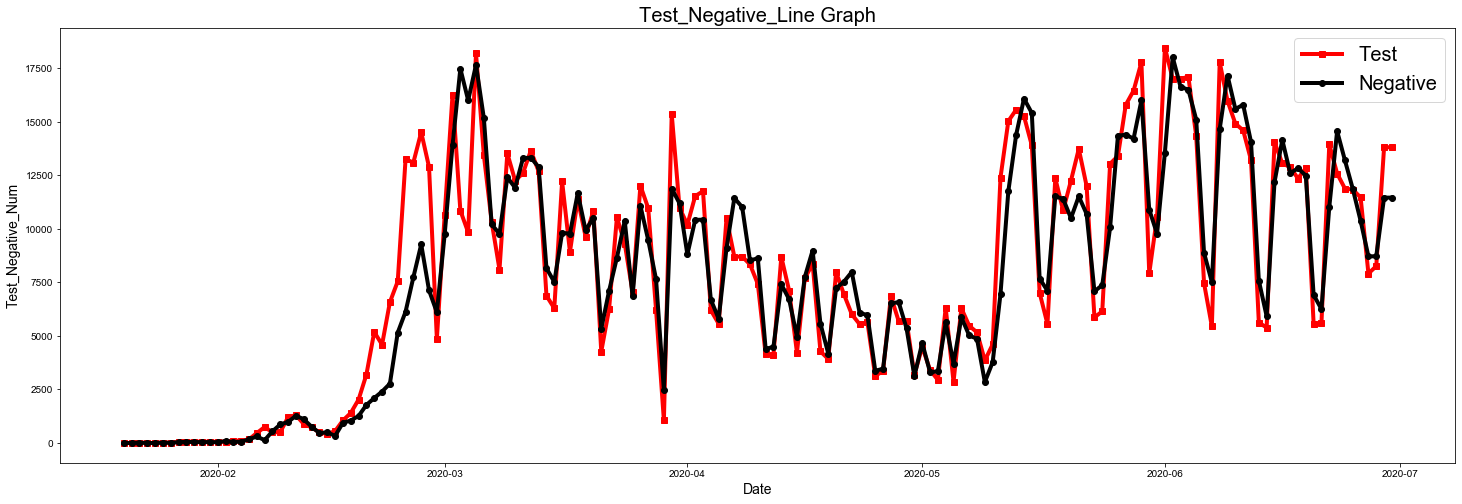

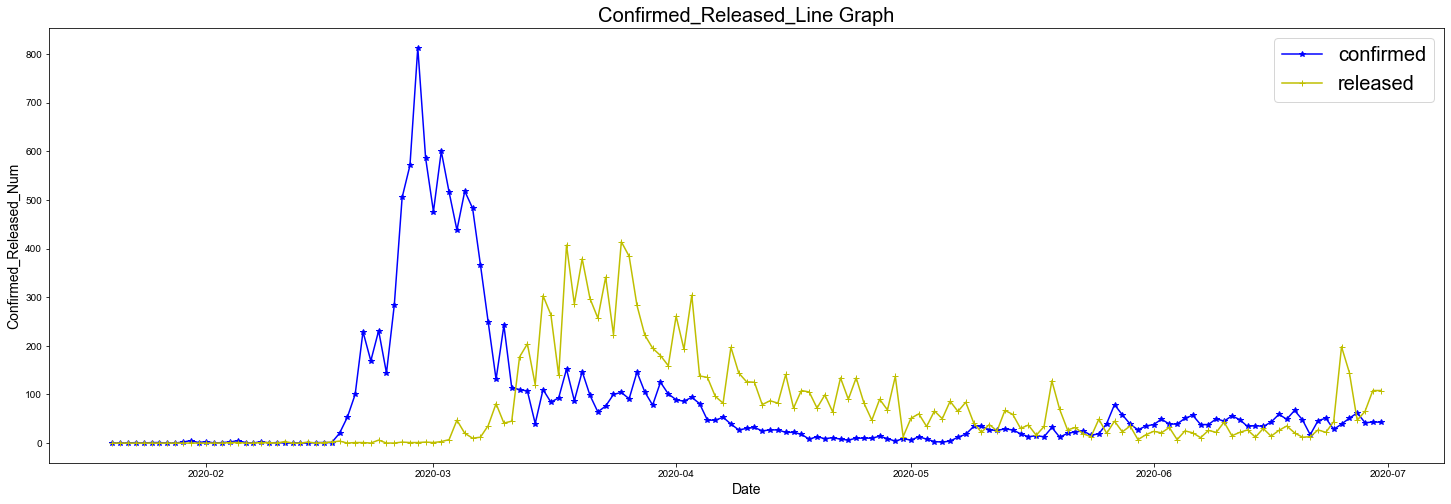

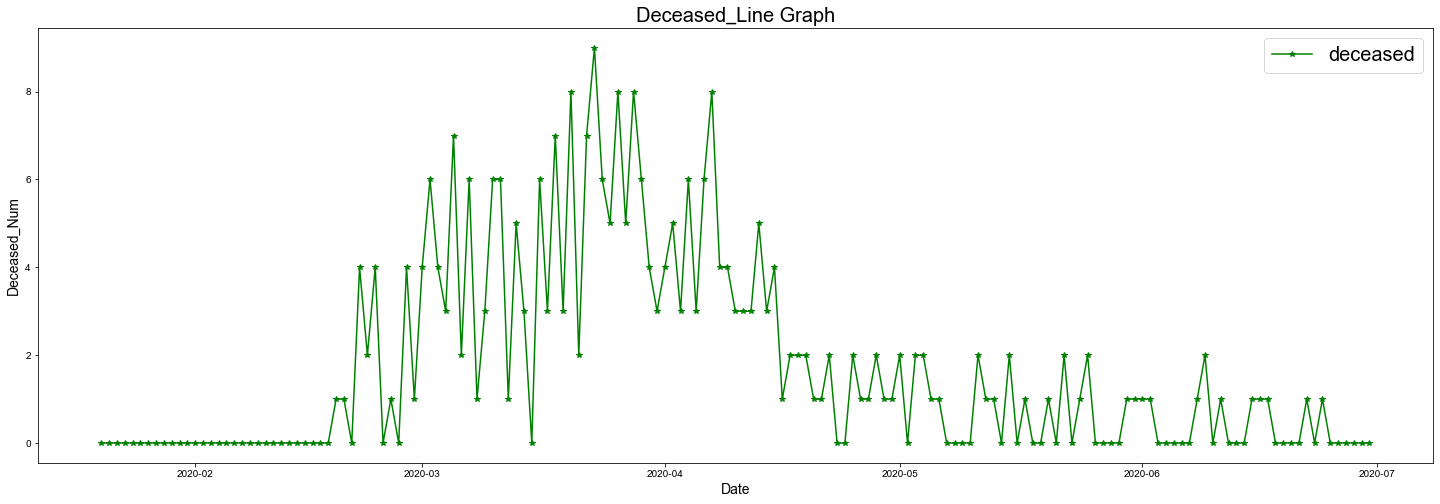

In [120]:
plt.figure(figsize=(25,8))
plt.plot(Time['date'], Time['test'],  linewidth=4, marker='s', color='r',label="Test")
plt.plot(Time['date'], Time['negative'], linewidth=4,marker='o', color='k',label="Negative")
plt.legend()
plt.title('Test_Negative_Line Graph', fontsize=20)
plt.ylabel('Test_Negative_Num', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=20, loc='best')
plt.show()
plt.figure(figsize=(25,8))
plt.plot(Time['date'], Time['confirmed'], marker='*', color='b',label="confirmed")
plt.plot(Time['date'],Time['released'], marker='+', color='y',label="released")
plt.title('Confirmed_Released_Line Graph', fontsize=20)
plt.ylabel('Confirmed_Released_Num', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=20, loc='best')
plt.show()
plt.figure(figsize=(25,8))
plt.plot(Time['date'], Time['deceased'], marker='*', color='g',label="deceased")
plt.title('Deceased_Line Graph', fontsize=20)
plt.ylabel('Deceased_Num', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=20, loc='best')
plt.show()

- Test의 수는 2,3월 증가하는 추세를 보이고 4월에 감소하는 경향을 보이다 5월 중순을 기점으로 다시 증가하는 것을 확인할 수 있다.
- Confirmed의 수는 1월 말에 큰 증가 폭을 보이고 3월부터 감소하고있다.




### web, blog, cafe에서의  삼성전자 관련 키워드와 코로나 연관 키워드 게시물의 수 데이터<br>
* web, blog, cafe에서의  삼성전자 관련 키워드와 코로나 연관 키워드 게시물의 수 데이터를 groupby통해서 날짜 별로 정리한다
##### <center>코로나 연관 키워드는 1~10위만 분석에 사용한다.<br>
<center>
    <img src="http://www.dailymedipharm.com/news/photo/202005/50875_18488_832.png">
</center>      

http://www.dailymedipharm.com/news/articleView.html?idxno=50875

In [172]:
삼성전자=internet_keyword('삼성전자')
주식=internet_keyword('주식')
주가=internet_keyword('주가')
코로나 = internet_keyword('코로나')
반도체 = internet_keyword('반도체')
중국= internet_keyword('중국')
코로나_19= internet_keyword('코로나19')
우한= internet_keyword('우한')
바이러스= internet_keyword('바이러스')
감염 = internet_keyword('감염 ')
코로나삼성전자=internet_keyword('코로나삼성전자')
코로나주식=internet_keyword('코로나주식')
코로나주가=internet_keyword('코로나주가')
코로나반도체 = internet_keyword('코로나반도체')
코로나휴대폰 = internet_keyword('코로나휴대폰')
비대면 = internet_keyword('비대면')
팬데믹 = internet_keyword('팬데믹')
홈코노미 = internet_keyword('홈코노미')
포스트코로나 = internet_keyword('포스트코로나')
거리두기 = internet_keyword('거리두기')

# 코로나 연관 키워드 1~10위
확산 = internet_keyword('확산')
마스크  = internet_keyword('마스크 ')
지역= internet_keyword('지역')
생각= internet_keyword('생각')
정부= internet_keyword('정부')
서울= internet_keyword('서울')
사태= internet_keyword('사태')
제공= internet_keyword('제공')
어렵다= internet_keyword('어렵다')
확진자= internet_keyword('확진자')


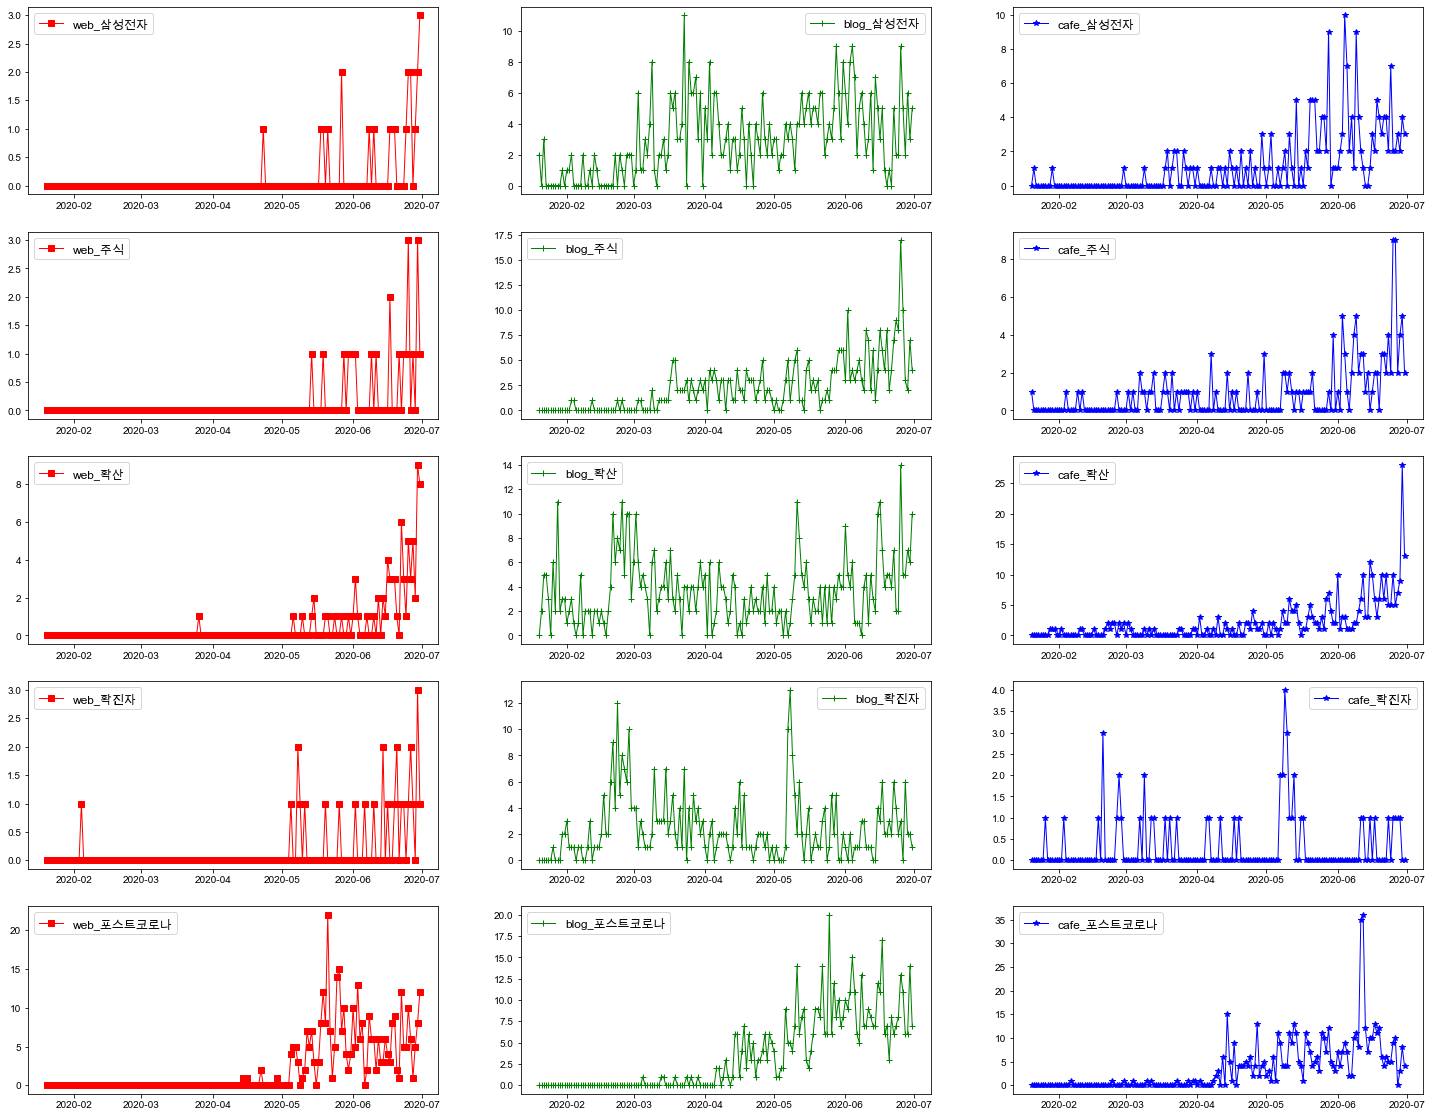

In [173]:
plt.figure(figsize=(25,20))
plt.subplot(531)
plt.plot(삼성전자['date'], 삼성전자['web_삼성전자'],  linewidth=1, marker='s', color='r',label="web_삼성전자")
plt.legend(fontsize=12, loc='best')
plt.subplot(532)
plt.plot(삼성전자['date'], 삼성전자['blog_삼성전자'],  linewidth=1, marker='+', color='g',label="blog_삼성전자")
plt.legend(fontsize=12, loc='best')
plt.subplot(533)
plt.plot(삼성전자['date'], 삼성전자['cafe_삼성전자'],  linewidth=1, marker='*', color='b',label="cafe_삼성전자")
plt.legend(fontsize=12, loc='best')

plt.subplot(534)
plt.plot(주식['date'], 주식['web_주식'],  linewidth=1, marker='s', color='r',label="web_주식")
plt.legend(fontsize=12, loc='best')
plt.subplot(535)
plt.plot(주식['date'], 주식['blog_주식'],  linewidth=1, marker='+', color='g',label="blog_주식")
plt.legend(fontsize=12, loc='best')
plt.subplot(536)
plt.plot(주식['date'], 주식['cafe_주식'],  linewidth=1, marker='*', color='b',label="cafe_주식")
plt.legend(fontsize=12, loc='best')

plt.subplot(537)
plt.plot(확산['date'], 확산['web_확산'],  linewidth=1, marker='s', color='r',label="web_확산")
plt.legend(fontsize=12, loc='best')
plt.subplot(538)
plt.plot(확산['date'], 확산['blog_확산'],  linewidth=1, marker='+', color='g',label="blog_확산")
plt.legend(fontsize=12, loc='best')
plt.subplot(539)
plt.plot(확산['date'], 확산['cafe_확산'],  linewidth=1, marker='*', color='b',label="cafe_확산")
plt.legend(fontsize=12, loc='best')

plt.subplot(5,3,10)
plt.plot(확진자['date'], 확진자['web_확진자'],  linewidth=1, marker='s', color='r',label="web_확진자")
plt.legend(fontsize=12, loc='best')
plt.subplot(5,3,11)
plt.plot(확진자['date'], 확진자['blog_확진자'],  linewidth=1, marker='+', color='g',label="blog_확진자")
plt.legend(fontsize=12, loc='best')
plt.subplot(5,3,12)
plt.plot(확진자['date'], 확진자['cafe_확진자'],  linewidth=1, marker='*', color='b',label="cafe_확진자")
plt.legend(fontsize=12, loc='best')

plt.subplot(5,3,13)
plt.plot(포스트코로나['date'], 포스트코로나['web_포스트코로나'],  linewidth=1, marker='s', color='r',label="web_포스트코로나")
plt.legend(fontsize=12, loc='best')
plt.subplot(5,3,14)
plt.plot(포스트코로나['date'], 포스트코로나['blog_포스트코로나'],  linewidth=1, marker='+', color='g',label="blog_포스트코로나")
plt.legend(fontsize=12, loc='best')
plt.subplot(5,3,15)
plt.plot(포스트코로나['date'], 포스트코로나['cafe_포스트코로나'],  linewidth=1, marker='*', color='b',label="cafe_포스트코로나")
plt.legend(fontsize=12, loc='best')

plt.show()


### web, blog, cafe 3가지 매체의 특성 파악<br>
* web : 포스팅되는 게시물은 6,7월에 대부분 집중되어 있다.<br>
* blog : 3가지 매체 중 가장 포스팅되는 게시물의 빈도수가 높으며 전반적으로 데이터의 변화가 많다는 것을 확인할 수 있다.<br>
* cafe : web의 데이터와 비슷하게 6,7월에 집중된다.




In [54]:
kakao_api_blog('삼성전자',1)['documents'][0]['contents']


'<b>삼성전자</b> 주가 4/17일 분석 하겠습니다. 오늘 드디어 외국인 수급이 돌아왔습니다. 일단 수급부터 살펴보시지요. 이 얼마만에 보는 외국인과 기관의 쌍끌이 매수입니까. 오늘 외국인이 장 초반부터 작정 하고 들어오는게 보였는데요. 거래원에 강하게 외국인의 매수가 찍혀서 시초가가 높긴 하더라도 자신있게...'

In [55]:
kakao_api_cafe('삼성전자',1)['documents'][0]['contents']


'6월 08일 월요일 저녁방송 노트(2200돌파 개인 3800억 매수하는 이유 <b>삼성전자</b> 사야한다) 주식투자 주식공부 <b>삼성전자</b> 하이닉스 셀트리온 ㅇ 오늘의 우리증시 코스피...'

In [354]:
stock_web('삼성전자',1)['documents'][1]['contents']


'전세계에서 9만6898명의 직원을 고용하고 있으며 세계 51개국에 90개가 넘는 오피스를 열고 있다. <b>삼성전자</b>는 디지털 어플라이언스 부문, 디지털 미디어 부분, LCD부분, 반도체 부분, 통신 네트워크 부분 등 5개...'

#### cafe, blog에서는 삼성전자라는 키워드에 주식과 관련된 게시물이 상당부분 존재하고, web의 경우 삼성전자의 산업관련 이슈에 관한 내용들이 주를 이룬다.



In [124]:
internet_data=pd.concat([삼성전자,주식,주가,코로나,반도체,중국,코로나_19,우한,바이러스,마스크,감염,코로나삼성전자
                         ,코로나주가,코로나주식,코로나반도체,코로나휴대폰,확산,마스크,지역,생각,정부,서울,사태,제공,어렵다,확진자],axis = 1)
internet_data=internet_data.drop('date',axis =1)
internet_data['date'] = Time['date']
internet_data=internet_data.rename({'date':'Date'},axis = 1)
internet_data.tail()


,web_삼성전자,cafe_삼성전자,blog_삼성전자,web_주식,cafe_주식,blog_주식,web_주가,cafe_주가,blog_주가,web_코로나,...,web_제공,cafe_제공,blog_제공,web_어렵다,cafe_어렵다,blog_어렵다,web_확진자,cafe_확진자,blog_확진자,Date
158,3.0,2.0,5.0,0.0,9.0,10.0,4.0,6.0,2.0,1.0,...,0.0,5.0,10.0,4.0,1.0,3.0,2.0,1.0,0.0,2020-06-26
159,0.0,4.0,2.0,1.0,2.0,3.0,1.0,8.0,1.0,0.0,...,3.0,3.0,5.0,2.0,2.0,5.0,1.0,1.0,6.0,2020-06-27
160,1.0,2.0,6.0,0.0,4.0,2.0,2.0,6.0,2.0,0.0,...,2.0,4.0,2.0,4.0,1.0,2.0,0.0,1.0,2.0,2020-06-28
161,3.0,4.0,4.0,3.0,5.0,7.0,5.0,12.0,1.0,0.0,...,4.0,17.0,11.0,6.0,4.0,2.0,3.0,0.0,2.0,2020-06-29
162,3.0,3.0,5.0,1.0,2.0,4.0,10.0,2.0,0.0,1.0,...,6.0,13.0,4.0,4.0,3.0,4.0,1.0,0.0,1.0,2020-06-30


In [125]:
dfs_exchange_rate=[df_USD_KRW,df_USD_EUR,df_USD_JPY,df_CNY_KRW,df_EUR_USD,df_EUR_USD,df_USD_JPY,df_JPY_KRW,df_AUD_USD,df_EUR_JPY,df_USD_RUB]
dfs_stock_price_index_=[df_KS11,df_KQ11,df_DJI,df_IXIC,df_JP225,df_CSI300,df_HSI,df_FTSE,df_DAX,df_CAC]
dfs_overseas_company = [df_apple, df_amazon, df_google]
overseas_company = reduce(lambda left, right: pd.merge(left, right, on='Date',how = 'outer'), dfs_overseas_company)
exchange_rate = reduce(lambda left, right: pd.merge(left, right, on='Date',how = 'outer'), dfs_exchange_rate)
stock_price_index = reduce(lambda left, right: pd.merge(left, right, on='Date',how = 'outer'), dfs_stock_price_index_)


In [149]:
full_date=pd.merge(internet_data,overseas_company,how = 'outer')
full_date=pd.merge(full_date,stock_price_index,how = 'outer')
samsung_stock.drop(['High','Low','Open','Volume','Adj Close'],axis =1,inplace = True)
samsung_stock.rename({'Close':'samsung','date':'Date'},axis = 'columns',inplace = True)
full_date=pd.merge(full_date,samsung_stock)
full_date.fillna(method='bfill',inplace = True)
full_date.head()

,web_삼성전자,cafe_삼성전자,blog_삼성전자,web_주식,cafe_주식,blog_주식,web_주가,cafe_주가,blog_주가,web_코로나,...,HSI,FTSE,DAX,CAC,test,negative,confirmed,released,deceased,samsung
0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28795.91,687.1,28.48,46.28,0,0,0,0,0,62400.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27985.33,683.7,28.48,46.28,3,3,0,0,0,61400.0
2,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,28341.04,680.6,28.46,46.34,18,18,0,0,0,62300.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27909.12,674.2,28.27,46.31,5,4,1,0,0,60800.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27949.64,681.5,28.31,46.21,0,0,0,0,0,60800.0


2.2 데이터 분석
---

### 2.2.1 상관분석
* 상관분석을 통해  97개의 종속변수와 독립변수(**삼성전자주가**)의 상관계수를 파악한다.

In [151]:
full_date_corr =full_date.corr()
full_date_corr


,web_삼성전자,cafe_삼성전자,blog_삼성전자,web_주식,cafe_주식,blog_주식,web_주가,cafe_주가,blog_주가,web_코로나,...,HSI,FTSE,DAX,CAC,test,negative,confirmed,released,deceased,samsung
web_삼성전자,1.000000,0.269502,0.198028,0.519755,0.560198,0.446749,0.692299,0.424277,0.143940,0.316115,...,-0.091887,-0.031765,0.130349,-0.114491,0.259251,0.230090,-0.079583,0.043026,-0.214982,-0.030264
cafe_삼성전자,0.269502,1.000000,0.368934,0.356939,0.366003,0.402458,0.325083,0.441945,0.275690,0.497660,...,-0.287875,-0.143423,0.085075,-0.247886,0.440081,0.447739,-0.158644,-0.064121,-0.194526,-0.171987
blog_삼성전자,0.198028,0.368934,1.000000,0.193295,0.355090,0.408399,0.195768,0.314922,0.345065,0.171491,...,-0.573269,-0.488529,-0.346017,-0.508847,0.537761,0.527288,-0.071650,0.376526,0.175140,-0.508317
web_주식,0.519755,0.356939,0.193295,1.000000,0.537738,0.541656,0.620024,0.390052,0.151661,0.426480,...,-0.100106,-0.029552,0.151401,-0.122829,0.286652,0.301923,-0.079100,-0.008035,-0.171332,-0.041105
cafe_주식,0.560198,0.366003,0.355090,0.537738,1.000000,0.550677,0.601588,0.444182,0.322581,0.466985,...,-0.178225,-0.130264,0.095542,-0.208684,0.331502,0.360241,-0.076356,0.073937,-0.119738,-0.085848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
negative,0.230090,0.447739,0.527288,0.301923,0.360241,0.470033,0.298952,0.372706,0.384756,0.361726,...,-0.534670,-0.506476,-0.306042,-0.534726,0.941009,1.000000,0.293425,0.209096,0.262943,-0.454870
confirmed,-0.079583,-0.158644,-0.071650,-0.079100,-0.076356,-0.193526,-0.082369,-0.169217,-0.061500,-0.079356,...,0.150126,0.043652,-0.019965,0.176437,0.343600,0.293425,1.000000,-0.030849,0.340376,0.100934
released,0.043026,-0.064121,0.376526,-0.008035,0.073937,0.169681,0.006051,-0.013384,0.095758,-0.083588,...,-0.623599,-0.707140,-0.771380,-0.533144,0.185458,0.209096,-0.030849,1.000000,0.614651,-0.642390
deceased,-0.214982,-0.194526,0.175140,-0.171332,-0.119738,-0.099295,-0.202904,-0.158660,0.022400,-0.172019,...,-0.373629,-0.514276,-0.610203,-0.318226,0.245599,0.262943,0.340376,0.614651,1.000000,-0.438657


#### target_value와 유의미한 상관관계 데이터 선정
* 삼성전자 주가와 독립변수의 상관계수 절대값이 0.4이상의 데이터만을 추출해서 분석을 진행한다




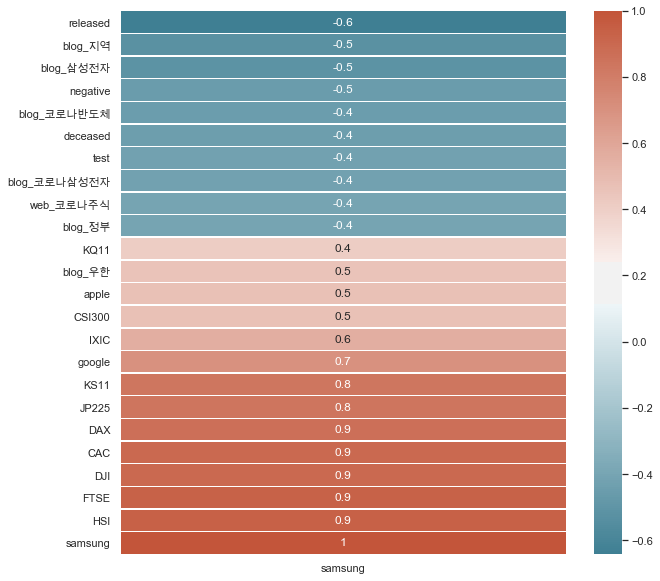

In [303]:
plt.figure(figsize=(10,10))
sns.heatmap(full_date_corr[(full_date_corr['samsung']>=0.4)|(full_date_corr['samsung']<=-0.4)][['samsung']].sort_values(by=['samsung'], axis=0), annot=True,fmt='.1g',linewidths=.5, cmap=cmap)

In [207]:
relation_data=full_date_corr[(full_date_corr['samsung']>=0.4)|(full_date_corr['samsung']<=-0.4)][['samsung']].index
relation_data # 상관계수 절댓값 0.4 이상의 독립변수 항목

Index(['blog_삼성전자', 'blog_우한', 'blog_코로나삼성전자', 'web_코로나주식', 'blog_코로나반도체',
       'blog_지역', 'blog_정부', 'apple', 'google', 'KS11', 'KQ11', 'DJI', 'IXIC',
       'JP225', 'CSI300', 'HSI', 'FTSE', 'DAX', 'CAC', 'test', 'negative',
       'released', 'deceased', 'samsung'],
      dtype='object')

Text(0.5, 1, 'Correlation analysis')

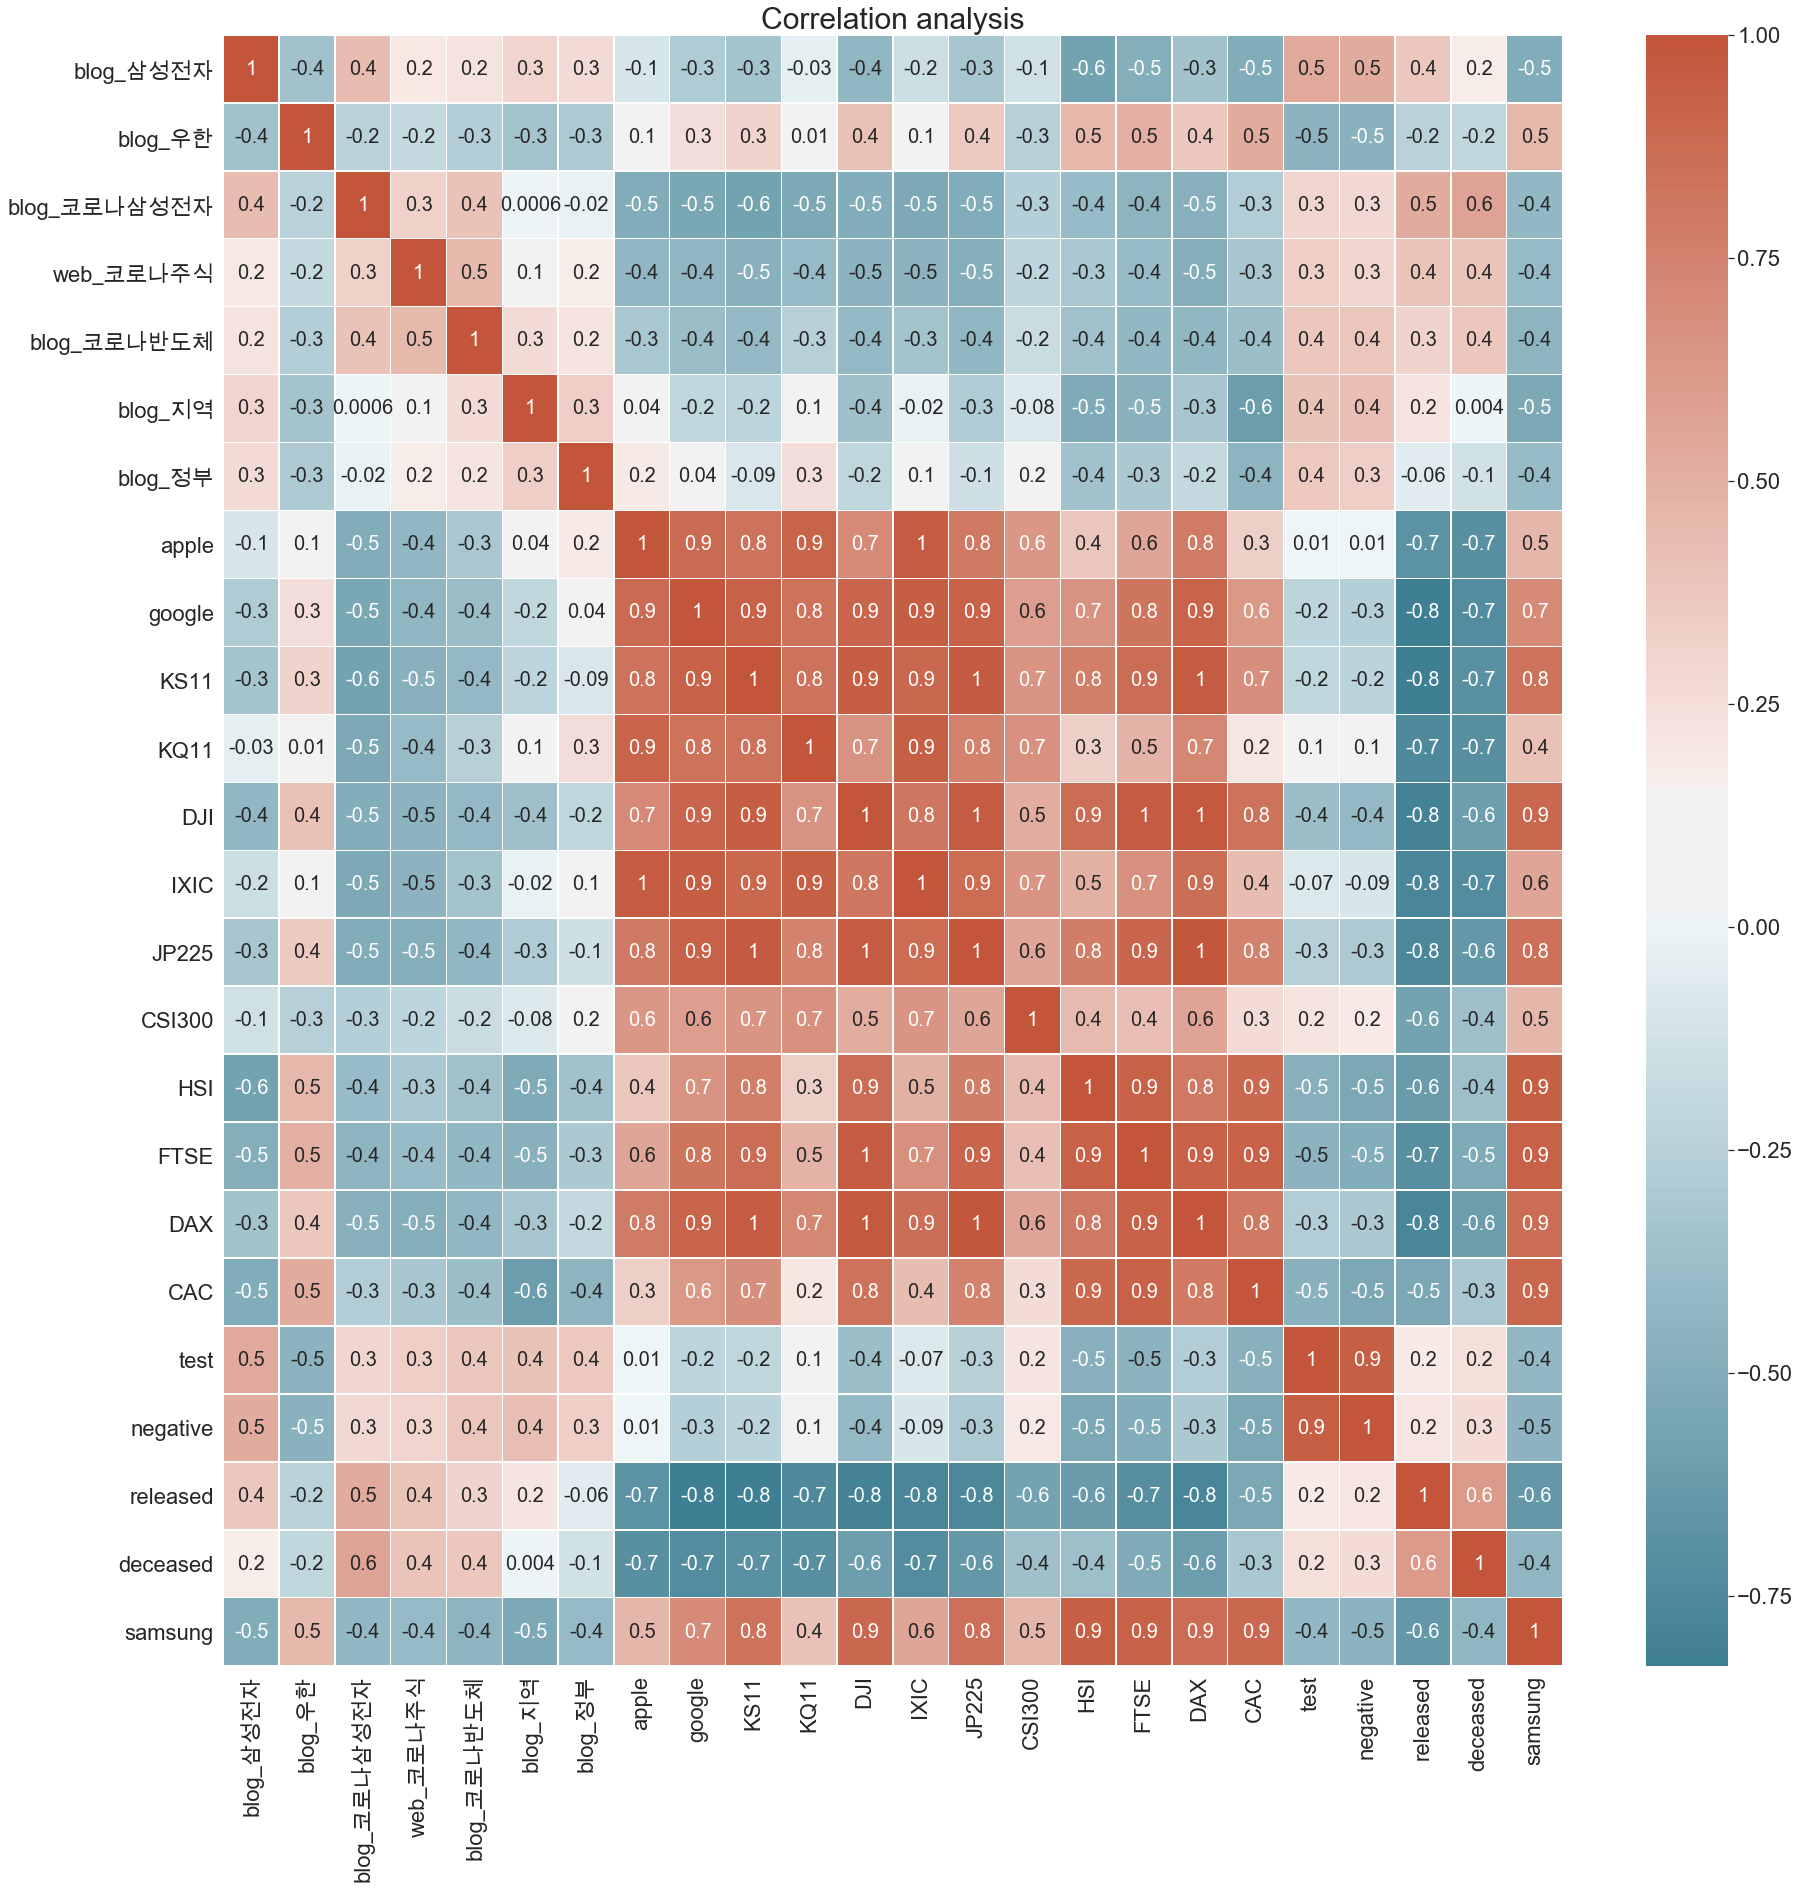

In [344]:
plt.figure(figsize=(30,30))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(full_date[relation_data].corr(), annot=True,fmt='.1g',linewidths=.5, annot_kws={"size": 20},cmap = cmap)
plt.title('Correlation analysis', fontsize=30)


주요 국가 지표 간의 상관분석에서 상관계수가 0.9 이상으로 상당히 높게 나오고 있다. 이 경우 데이터 간의 독립성이 떨어져 **다중공선성의 문제**가 발생하게 된다.<br>
다중공선성의 문제가 발생하면 독립변수 간에 강한 상관관계가 나타나서, 회귀분석의 전제가정인 독립변수간의 상관관계가 높으면 안 된다는 조건을 위배하게 된다.





In [281]:
full_date[relation_data[7:19]].head() # 서로간의 상관계수가 높게나온 독립변수


,apple,google,KS11,KQ11,DJI,IXIC,JP225,CSI300,HSI,FTSE,DAX,CAC
0,316.57,1484.40,2262.64,683.47,29196.04,9370.81,24083.51,4185.83,28795.91,687.1,28.48,46.28
1,316.57,1484.40,2239.69,676.52,29196.04,9370.81,23864.56,4114.31,27985.33,683.7,28.48,46.28
2,317.70,1485.95,2267.25,688.25,29186.27,9383.77,24031.35,4131.93,28341.04,680.6,28.46,46.34
3,319.23,1486.65,2246.13,685.57,29160.09,9402.48,23795.44,4003.90,27909.12,674.2,28.27,46.31
4,318.31,1466.71,2176.72,664.70,28989.73,9314.91,23827.18,3688.36,27949.64,681.5,28.31,46.21


<Figure size 1440x1440 with 0 Axes>

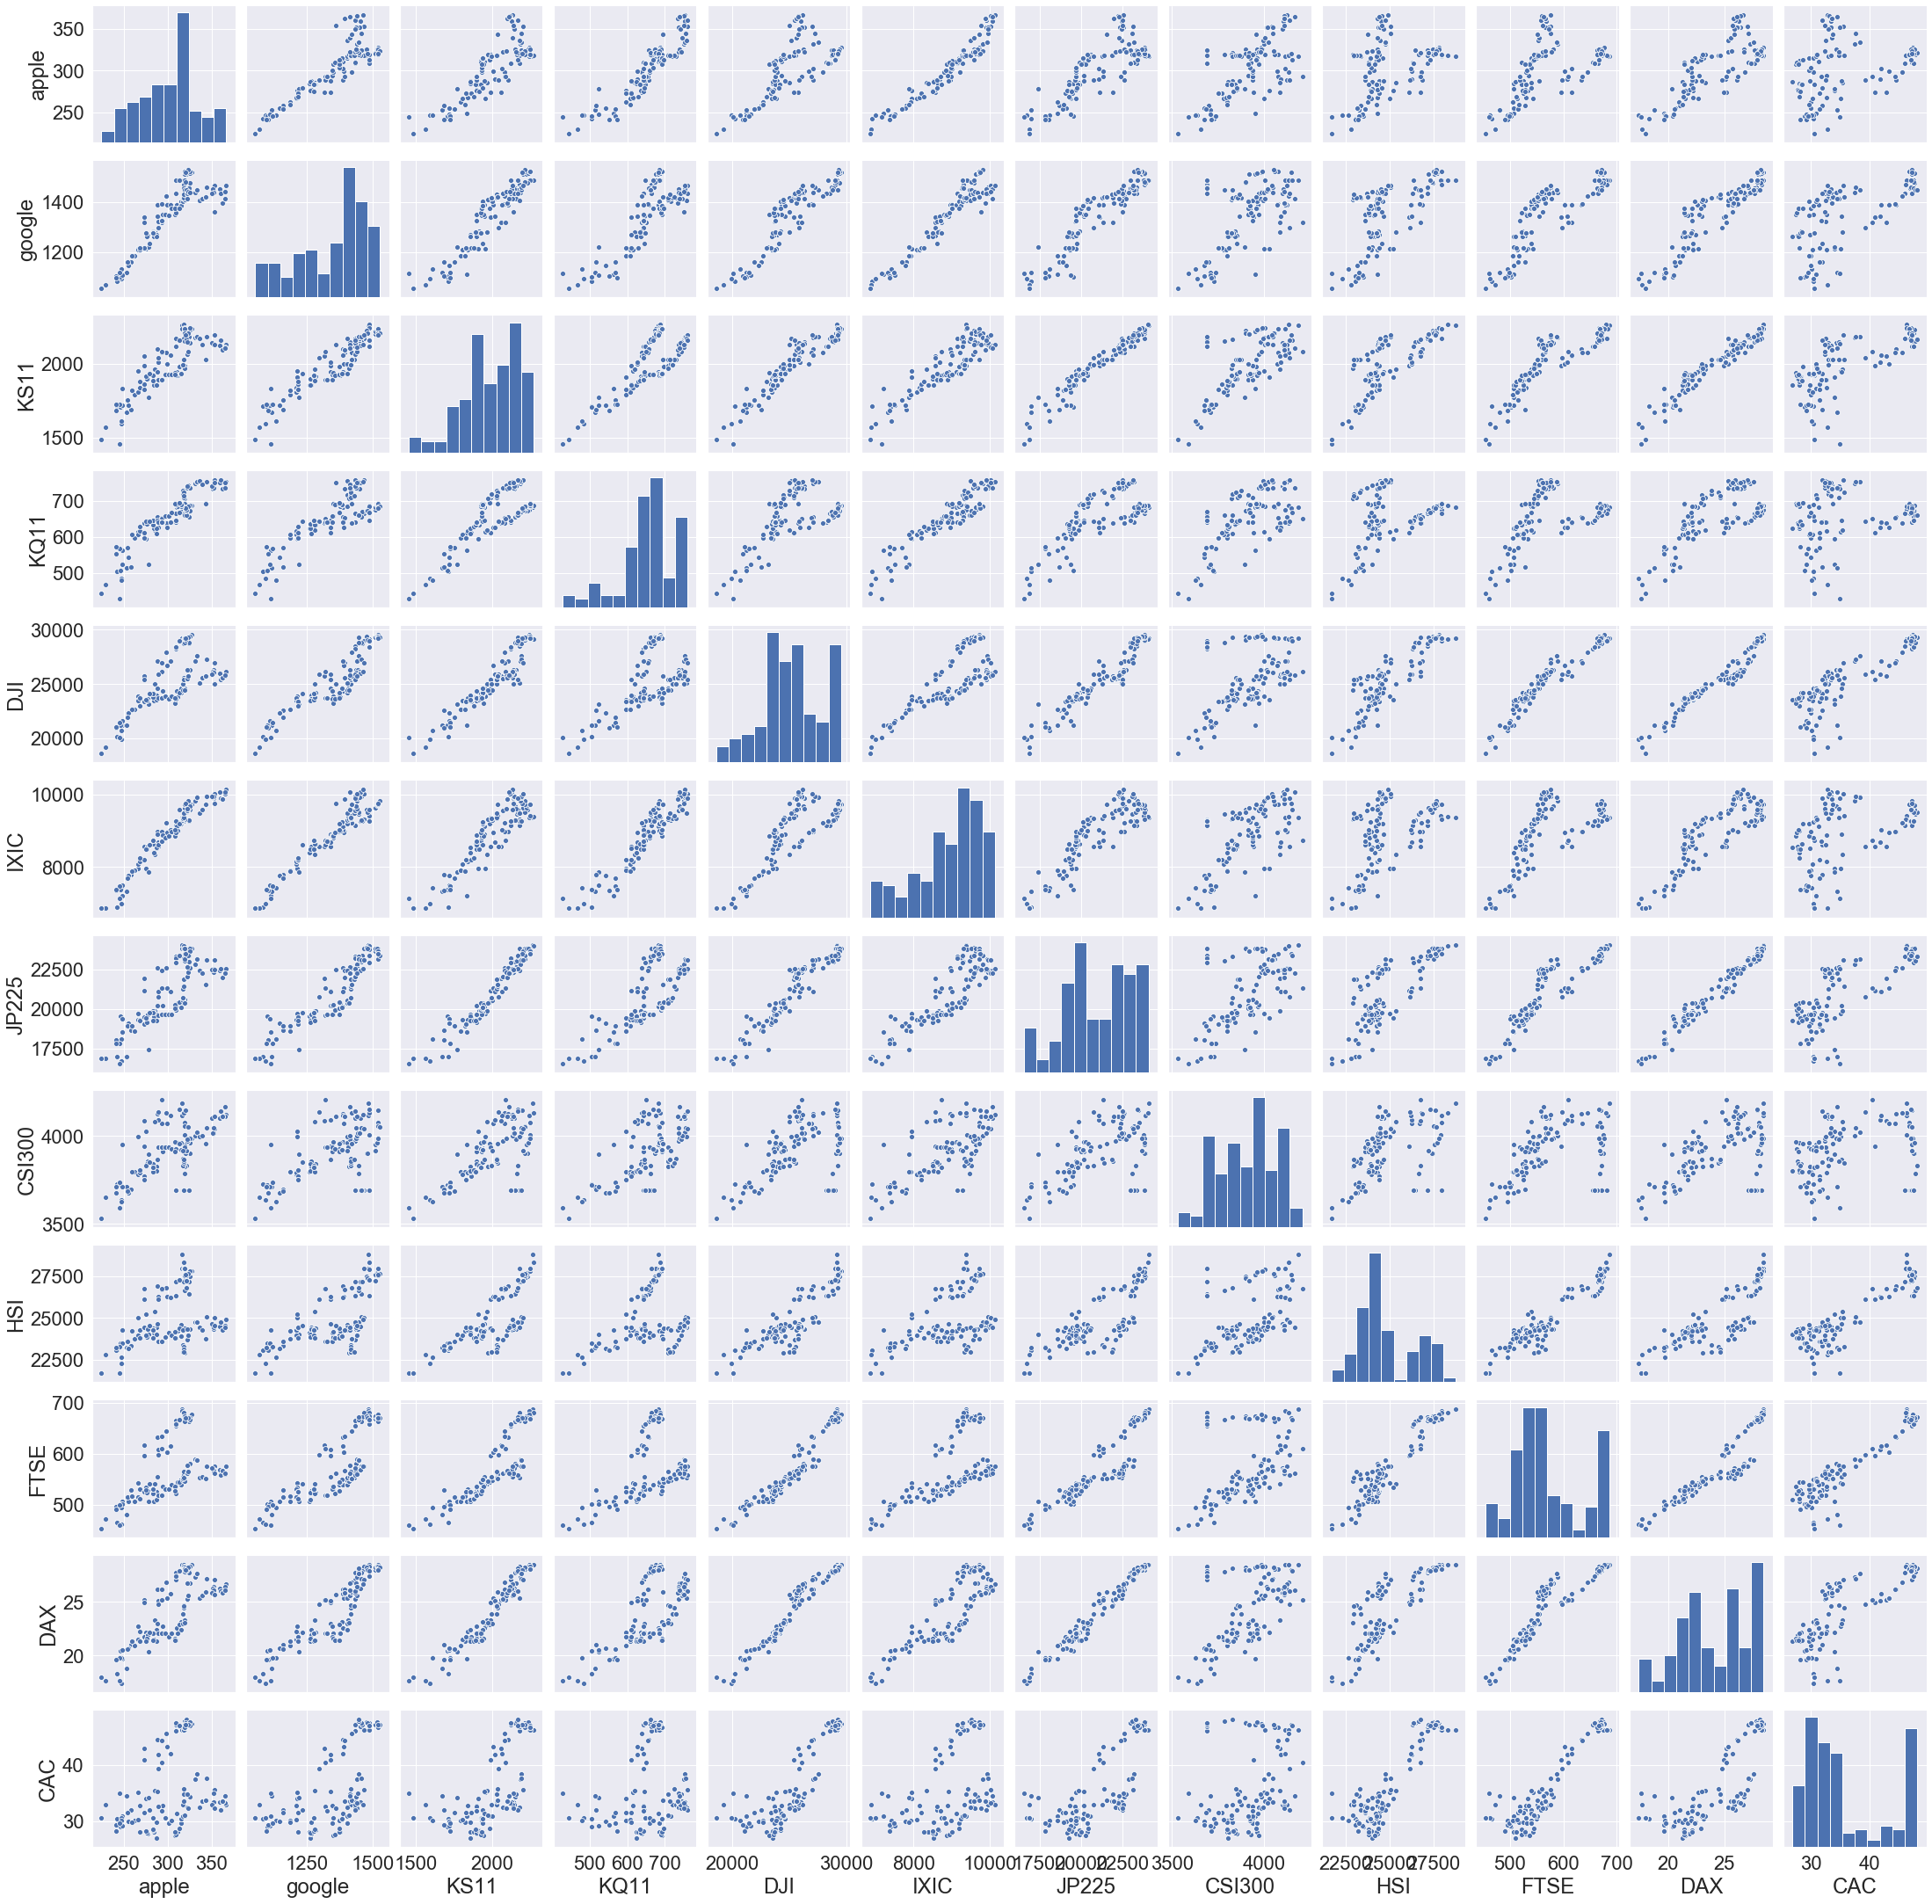

In [300]:
plt.figure(figsize=(20,20))
sns.pairplot(full_date[relation_data[7:19]])
plt.show()


['apple', 'google', 'KS11', 'KQ11', 'DJI', 'IXIC', 'JP225', 'CSI300','HSI', 'FTSE', 'DAX', 'CAC']의 데이터에서 서로간의 상관도가 매우 높은 모습을 볼수있다.
이러한 데이터를 핸들링하기 위해서 **데이터간의 차원축소**를 통해 문제점 해결이 필요해보인다.  
    

## 2.2.2 PCA(주성분 분석)
&nbsp;대부분의 통계분석은 예측자들이 서로 독립이라는 기본적인 가정을 가지고 있다. 그렇기 때문에 예측자를 '독립변수'라고 표현하기도 하며 각 예측자들의 통계적인 분포는 고려하지 않는다. 그런데 실제로는 그렇지 않은 경우가 많이 발생한다. 경우에 따라 예측자들은 크고 작은 관계를 가지고 있고 그 정도가 심하면 분석 결과를 신뢰할 수 없는 상황에 놓이게 된다. 이것을 다중공선성(multicollinearity)이라 부르며 다중공선성이 존재함에도 불구하고 모형을 적합하게되면 각 예측자의 기울기의 분산이 비정상적으로 높아지는 등의 문제가 발생할 수 있습니다. 이는 예측자가 많아질수록 더 큰 문제로 다가오는데, 예측자가 두 개인 경우, 서로에 대한 상관관계만을 갖지만 예측자가 늘어날수록 그 조합에 따라 매우 많은 상관관계를 고려해야 하기 때문이다.

&nbsp;이 문제를 해결하기 위한 방법으로는 여러 가지가 있지만 그중 가장 대표적으로 사용되는 것이 주성분 분석(principal component)이다. 주성분 분석은 예측자의 선형조합을 통하여 서로 독립적인 인공변수들을 만들어내는 방법으로, 통계 분석에 사용되는 가장 이상적인 변수를 생산해낸다는 점에서 매우 유용한 방법이라고 할 수 있다. 또한 이 과정에서 변수들이 가지고 있는 파워를 소수의 인공 변수로 몰아주어, 분석에 사용되는 변수를 줄여주는 효과를 볼 수 있다. 이를 '차원축소' 라고 표현하며 다중공선성과 더불어 통계 분석에서 아주 중요하게 취급되어진다. <br>

#### 주성분 분석을 통해서 다음 3가지의 문제를 최소화 시킨다
- 시각화: 많은 수의 변수들에 대해서는 불가능하다. <br>

- 계산적인 병목현상: 매우 많은 수의 변수들을 처리하는 것은 계산적으로 불가능할 수 있다.<br>

- Collinearity(공선성)(매우 연관된 변수들) 또는 관찰값 보다 더 많은 변수들은 회귀 유형 모델에 문제를 발생시킨다.  





In [174]:
full_date_x = full_date[relation_data].drop('samsung',axis = 1).values
full_date_y = full_date[relation_data][['samsung']].values
x = StandardScaler().fit_transform(full_date_x)  # 데이터 정규화


#### 몇 개의 주성분을 사용할 것인가? 

보편적인 규칙은 존재하지 않고, 경험 법칙에 의해서 주성분 개수를 정한다. 
- 경험 법칙 1: 설명된 분산의 축정 비율이 적어도 80% 이상이어야 한다. 
- 경험 법칙 2: 축적이 아니라, 아예 평균 분산 보다 큰 PC들을 선택하라는 것이다. 만약 상관 행렬/스케일된 데이터가 사용되었다면, 이것은 암시하기를   <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;적어도 한 개의 고유값과 함께 선택해야 한다. 
- **경험 법칙 3: scree plot을 보면서, "elbow" 지점이 존재하면 그 지점 이전까지의 PC들을 선택하라는 것이다.**(select)

In [249]:
pca = PCA(n_components=10) # 주성분을 몇개로 할지 결정할지 파악하기 위해 초기 10개의 주성분을 생성한다
printcipalComponents = pca.fit_transform(x)


In [250]:
pca.explained_variance_ratio_


array([0.51813808, 0.17548901, 0.06707004, 0.04386833, 0.03812731,
       0.03112334, 0.02771377, 0.02246284, 0.01702937, 0.01309119])

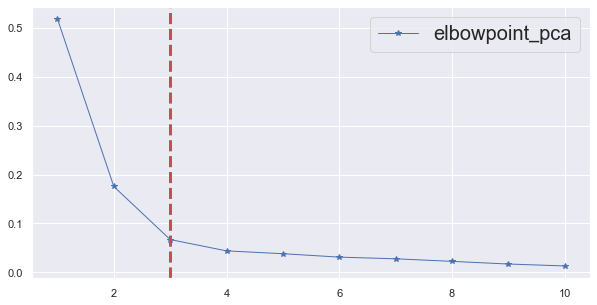

In [309]:
plt.figure(figsize = (10,5))
plt.plot(np.arange(10)+1,pca.explained_variance_ratio_,  linewidth=1, marker='*', color='b',label="elbowpoint_pca")
plt.axvline(x=3, color='r', linestyle='--', linewidth=3)
plt.legend(fontsize=20, loc='best')
plt.show()


 scree plot을 보면, pca3에서 "elbow"가 형성되는것을 확인할수있다. 그러므로 ***3개의 주성분***을 가지고 분석을 진행하겠다. 

In [189]:
pca = PCA(n_components=3) # elbow point를 기준으로 3개의 pca를 결정했다.
printcipalComponents = pca.fit_transform(x)

In [247]:
PCA_result=pd.DataFrame( pca.components_.T,columns = ['PCA1','PCA2','PCA3'])
PCA_result.index = relation_data[:23]

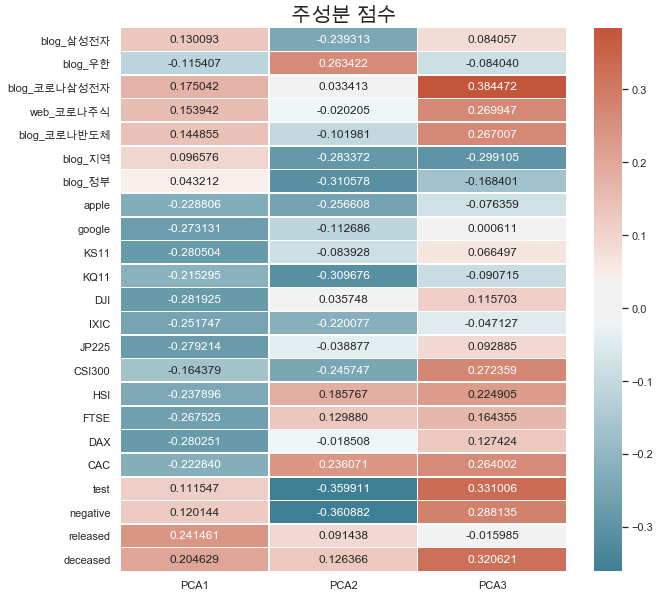

In [308]:
sns.set(font_scale=1)
font_name = font_manager.FontProperties(fname="/Library/Fonts/Arial Unicode.ttf").get_name()
rc('font', family=font_name)
plt.figure(figsize = (10,10))
sns.heatmap(PCA_result, annot=True, fmt='f',linewidths=.5, cmap=cmap)
plt.title('주성분 점수',fontsize=20)
plt.show()


&nbsp;선형결합을 통해서 구해진 값을 주성분 점수(principal score)라고 부르며 원 변수를 새 축의 관점에서의 바라보게 된다. 또한, 이 주성분 점수 값은 완전 독립적인 예측자로써, 회귀분석에 활용된다.


## 2.2.3 회귀분석(RandomForest)
주성분 분석을 통해 얻어진 3개의 독립변수를 가지고 Random Forest를 사용하여 회귀분석을 진행한다.

In [208]:
X_train, X_test, y_train, y_test = train_test_split(printcipalComponents, full_date_y, test_size=0.2, shuffle=True, random_state=333)
forest =  RandomForestRegressor(n_estimators=1000, criterion="mse",random_state=1,n_jobs=-1)
forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('훈련 R^2: %.3f, 테스트 R^2: %.3f'%(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))


훈련 R^2: 0.985, 테스트 R^2: 0.945


R-squre는 0~1사이의 값을 갖는다. 관계가 높을 수록 1에 가까운 값을 가지게된다. 즉, 0에 가까울수록, 수식에 데이터 분포를 제대로 표현하지 못하는 것이며, 1에 가까워지면 모든 데이터가 해당 수식에 접근한다는 것을 의미한다.
분석결과 0.9이상의 R-squre값을 가지며 독립변수의 움직임이 종속변수의 움직임을 잘 해석한다.






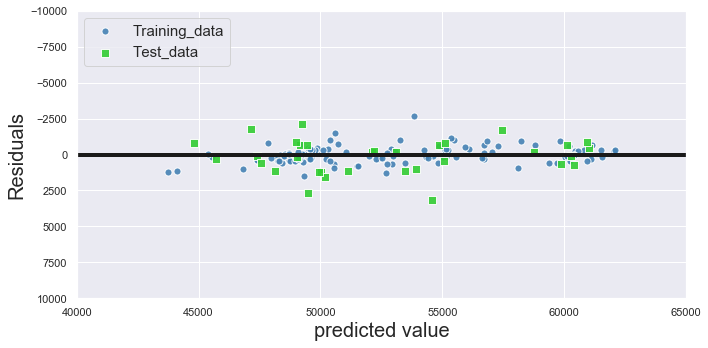

In [319]:
plt.figure(figsize = (10,5))
plt.scatter(y_train_pred, y_train_pred - y_train.reshape(-1), c = 'steelblue',edgecolors='white', marker = 'o', s = 50, alpha=0.9, label = 'Training_data')
plt.scatter(y_test_pred, y_test_pred - y_test.reshape(-1), c = 'limegreen',edgecolors='white', marker = 's', s = 50, alpha=0.9, label = 'Test_data')
plt.axhline(y=5, xmin=0, xmax=1 ,linewidth=4, color = 'k')
plt.xlabel('predicted value',fontsize=20)
plt.ylabel('Residuals',fontsize=20)
plt.legend(loc = 'upper left',fontsize=15)
plt.hlines(y=0, xmin = 10, xmax = 50, lw=2, color = 'black')
plt.xlim([40000,65000])
plt.ylim([10000,-10000])
plt.tight_layout()
plt.show()


잔차 그래프를 확인해본 결과 잔차가 어떤 패턴을 가지지 않고 0을 중심으로 랜덤하게 분포하고 있는것을 확인할수있다

### 코로나 관련 데이터를 제외
* 크롤링 데이터와 Time 데이터가 모델의 정확도에 긍정적인 영향을 주었는지 확인하기 위해 코로나 관련 데이터를 제외하고 분석을 진행한다.

In [329]:
except_corona_data = StandardScaler().fit_transform(full_date[relation_data[7:19]])


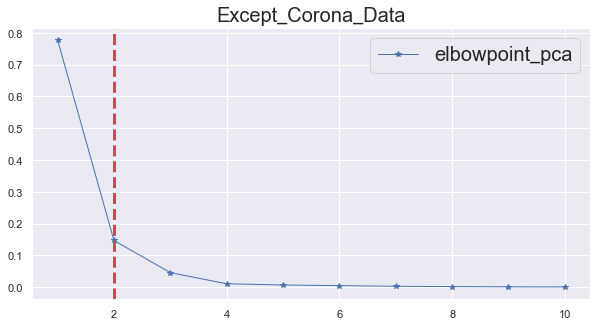

In [341]:
pca = PCA(n_components=10) # 주성분을 몇개로 할지 결정
printcipalComponents_except_corona = pca.fit_transform(except_corona_data)

plt.figure(figsize = (10,5))
plt.plot(np.arange(10)+1,pca.explained_variance_ratio_,  linewidth=1, marker='*', color='b',label="elbowpoint_pca")
plt.axvline(x=2, color='r', linestyle='--', linewidth=3)
plt.legend(fontsize=20, loc='best')
plt.title("Except_Corona_Data",fontsize = 20)
plt.show()

In [337]:
pca = PCA(n_components=2) # elbow point를 기준으로 2개의 pca를 결정
printcipalComponents_except_corona = pca.fit_transform(x)


In [338]:
X_train, X_test, y_train, y_test = train_test_split(printcipalComponents_except, full_date_y, test_size=0.2, shuffle=True, random_state=333)
forest =  RandomForestRegressor(n_estimators=1000, criterion="mse",random_state=1,n_jobs=-1)
forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('훈련 R^2: %.3f, 테스트 R^2: %.3f'%(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))


훈련 R^2: 0.976, 테스트 R^2: 0.871


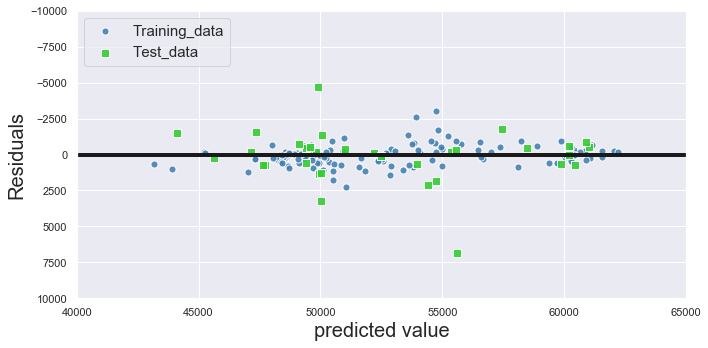

In [339]:
plt.figure(figsize = (10,5))
plt.scatter(y_train_pred, y_train_pred - y_train.reshape(-1), c = 'steelblue',edgecolors='white', marker = 'o', s = 50, alpha=0.9, label = 'Training_data')
plt.scatter(y_test_pred, y_test_pred - y_test.reshape(-1), c = 'limegreen',edgecolors='white', marker = 's', s = 50, alpha=0.9, label = 'Test_data')
plt.axhline(y=5, xmin=0, xmax=1 ,linewidth=4, color = 'k')
plt.xlabel('predicted value',fontsize=20)
plt.ylabel('Residuals',fontsize=20)
plt.legend(loc = 'upper left',fontsize=15)
plt.hlines(y=0, xmin = 10, xmax = 50, lw=2, color = 'black')
plt.xlim([40000,65000])
plt.ylim([10000,-10000])
plt.tight_layout()
plt.show()

### 두 모델를 비교한 결과 코로나 관련 키워드 크롤링 데이터와 Time데이터를 변수로 추가한 모델에서의 정확도가 더 높게 측정 된다.<br>


# 3. 결론

### 3.1 데이터에 대한 해석

#### Blog의 특징
&nbsp;블로그는 누구나 쉽게 만들 수 있고, 개인 홈페이지와는 달리 누구에게나 열려 있으며 접근이 용이하다, 또한 빠른 전파력과 확산 속도를 가지고 있다. 이러한 특성으로 인해 블로그는 개인적 공간으로서 이용될 뿐 아니라 전통적인 미디어의 대표적인 속성인 **정보를 제공하고 여론을 형성, 확산시킬 수 있다.** 기존의 포털 사이트들이 많은 정보를 제공해 주기는 했으나 개인이 원하는 정보를 수집해서 모아두거나 특정 사람들 혹은 불특정 다수에게 공개할 수 있고 또 코멘트를 달아 자신의 생각까지 전달할 수 있다. 또한 내가 필요한 정보를 다른 사람의 블로그를 통해 얻을 수도 있다. 특히 블로그는 유사 커뮤니티적 속성으로 인해 사회적 쟁점이나 이슈가 되는 사안을 신속히 세력화 하고 확산시킬 수 있다. **블로그는 특정 주제에 대한 정보가 집적**되고 그에 대한 의견이 첨부되기도 하며, 특정 집단이나 불특정 다수에게 그 정보를 제공하거나 특정 시각까지 형성하게 한다는 점에서 미디어로서의 역할을 수행한다고 볼 수 있다.<br>
> 김영주. (2006). 블로그의 미디어적 기능과 한계. 한국언론학보, 50(2), 59-89.

#### <center> 이러한 블로그의 특징으로 인해 코로나 19라는 전대미문의 사태에 포스트 코로나에 대한 사람들의 관심을 다른 미디어보다 빠르게 반영한다고 생각한다.



#### Time 데이터의 특징
&nbsp;Time 데이터의 confirmed은 2,3월에 큰 증감을 보이고 5,6월에는 변동이 적은 것을 볼 수 있다. 하지만 test의 경우 5,6월 역시 큰 변동을 보인다.
확진자의 수에 변동이 적은데 검사자의 같은 결과를 나타내지 않는다는 것이다.
이러한 추론을 바탕으로 검사자의 증가는 국민들이 코로나19에 갖는 불안감을 반영하고 그 불안감이 산업 경제에 영향을 주는 것이라고 생각한다.

### 3.2 포스트 코로나의 삼성전자의 주가는?

<center>
    <img src="https://cfnimage.commutil.kr/phpwas/restmb_allidxmake.php?idx=3&simg=20200604090446058826c0eb6f11e20323964245.jpg">
</center> 
https://cfnimage.commutil.kr/phpwas/restmb_allidxmake.php?idx=3&simg=20200604090446058826c0eb6f11e20323964245.jpg

&nbsp;지난달만 해도 삼성전자 주가는 4만원대에 머물렀다. 신종 코로나바이러스 감염증(코로나19) 여파로 세계 경기가 암울해서다. 반도체 수요가 급감할 것이란 전망
으로 분석이 주를 이뤘다.
하지만 사회적 거리두기의 영향으로 pc와 휴대폰의 수요가 늘어나면서 다시 한번 반도체 시장의 호황이 예상된다. 삼성전자가 발표한 2분기 잠정실적에 따르면 영업이익은 지난해 동기보다 22.73% 증가한 8조1천억원, 매출은 7.36% 감소한 52조원을 기록했다. 증권사들 또한 일제히 삼성전자 2분기 상향 조정하는 모습을 보여준다.국내 증시 회복장에서 소외됐던 삼성전자가 다시 강세를 보이며 신종 코로나바이러스 감염증(코로나19) 사태 이후 최고가로 뛰어올랐다. 

#### <center> 반도체 부문은 호황을 이어가고 있고, 코로나19 충격이 초기 예상보다 크지 않을 것이라는 전망이다. </center> 




### 3.3 분석의 의미


<center>
    <img src="https://discover6sigma.org/img/pae-yeqfx.jpg", width="600">
</center> 


#### 다양한 산업에 적용가능한 베이스 모델링 

&nbsp;기존의 많이 연구되던 국가 주요 지표와 주가와의 관계에 대한 분석이 역변하는 코로나19로 많은 영향을 받는 지금 바로 적용하기에는 예측에 정확도가 떨어질 수밖에 없다고 생각한다. 이러한 예측의 불확실성을 조금이라도 보안하고자 하는 목표가 있었으며 분석의 결과 코로나 관련 키워드의 게시물과 코로나의 시계열적인 데이터가 예측의 불확실성을 보완해줄 수 있다는 결론을 얻을 수 있었다.<br> 
   &nbsp; 본 분석에서는 구체화를 위해서 종속변수를 삼성전자의 주가를 기준으로 진행했다. 하지만 종속변수는 삼성전자의 주가로 고정되는 것은 아니다 자신이 관심을 가지는 기업과 산업이 방정식의 y에 대입하여 적용해 볼 수 있다. 본 분석의 의미는 요동치는 코로나19의 시대에서 의미있는 분석 모델링을 만드는 것이며 이 모델링은 다양한 산업에 적용가능한 베이스 모델링으로써의 기능을 할 수 있다고 생각된다. 이 모델링이 완벽하지 않고 모든 것을 정확한 설명하지 못한다. 하지만 보다 많은 변수와 다양한 시각에서의 인사이트를 추가하여 모델을 점차 발전 시킬수 있을것이다. 